In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error , confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression


# Data Collection and Processing

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)
train = pd.read_csv("D:New folder/titanictrain.csv")
test= pd.read_csv("D:/New folder/titanictest.csv")

In [3]:
# Combine two data frames

In [4]:
df = pd.concat([train,test],axis=0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(1309, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [7]:
# setting PassengerId as index
df.set_index("PassengerId", inplace = True )

In [8]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


<AxesSubplot:ylabel='PassengerId'>

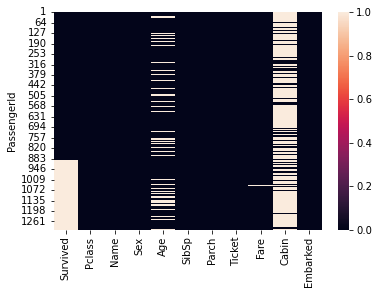

In [10]:
# Visualizing Missing Values
sns.heatmap(df.isna())

In [11]:
df.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [12]:
df.shape

(1309, 11)

In [13]:
# deleting columns with missing values except Age and Embarked
del df["Name"]
del df["Cabin"]
del df["Ticket"]
del df["Fare"]

In [14]:
df['Survived'].fillna(df['Survived'].value_counts().index[0],inplace = True)

In [15]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,,
1,0.0,3,male,22.0,1,0,S
2,1.0,1,female,38.0,1,0,C
3,1.0,3,female,26.0,0,0,S
4,1.0,1,female,35.0,1,0,S
5,0.0,3,male,35.0,0,0,S


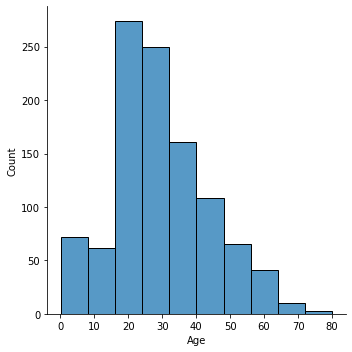

In [17]:
# Finding Average age of a passenger
sns.displot(df['Age'],bins=10)

In [18]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [19]:
print(df['Embarked'].mode())

0    S
dtype: object


In [20]:
print(df['Embarked'].mode()[0])

S


In [21]:
df["Embarked"].fillna(df['Embarked'].mode()[0],inplace=True)

In [22]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [24]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.261268,2.294882,29.881138,0.498854,0.385027
std,0.439494,0.837836,12.883193,1.041658,0.865560
min,0.000000,1.000000,0.170000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000
50%,0.000000,3.000000,29.881138,0.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,9.000000


In [25]:
df['Survived'].value_counts()

0.0    967
1.0    342
Name: Survived, dtype: int64

<AxesSubplot:ylabel='PassengerId'>

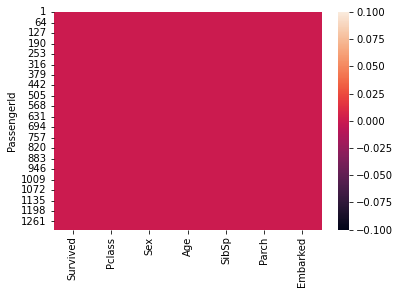

In [26]:
# Visualizing Missing Values
sns.heatmap(df.isna())

# Data Visualisation

In [27]:
sns.set()

<AxesSubplot:xlabel='Survived', ylabel='count'>

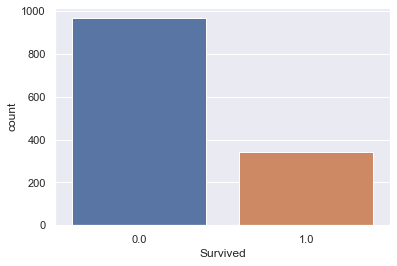

In [28]:
sns.countplot('Survived',data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

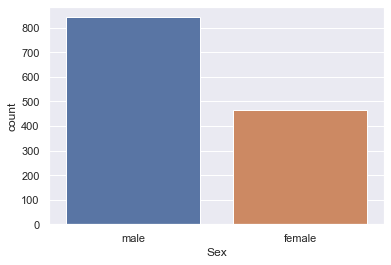

In [29]:
sns.countplot('Sex',data=df)

In [30]:
df['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

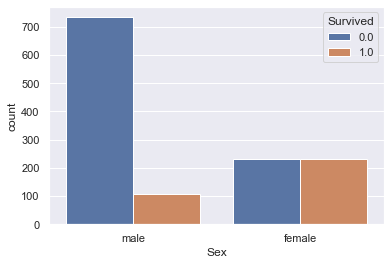

In [31]:
sns.countplot('Sex',hue='Survived',data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

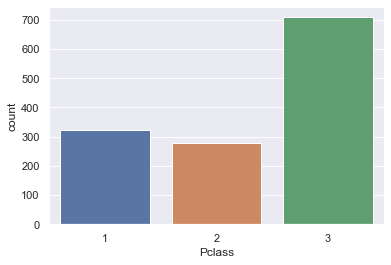

In [32]:
sns.countplot('Pclass',data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

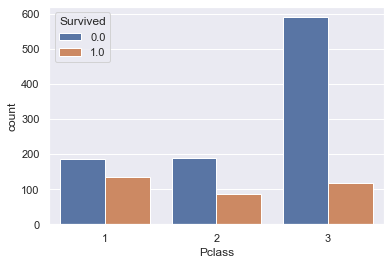

In [33]:
sns.countplot('Pclass',hue='Survived',data=df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

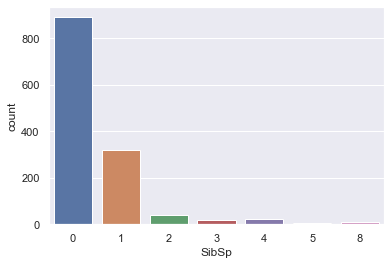

In [34]:
sns.countplot(df['SibSp'])

<AxesSubplot:xlabel='Parch', ylabel='count'>

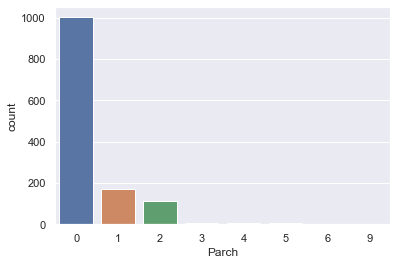

In [35]:
sns.countplot(df['Parch'])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

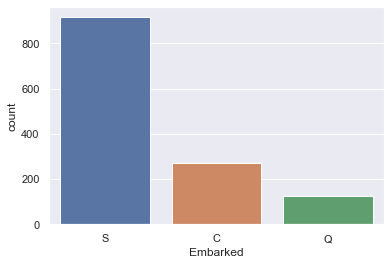

In [36]:
sns.countplot(df['Embarked'])

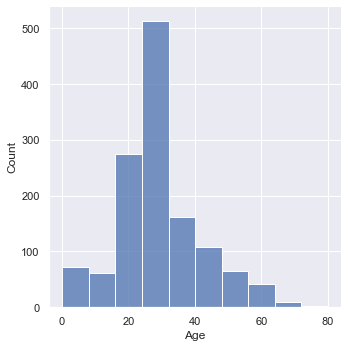

In [37]:
sns.displot(df['Age'],bins=10)

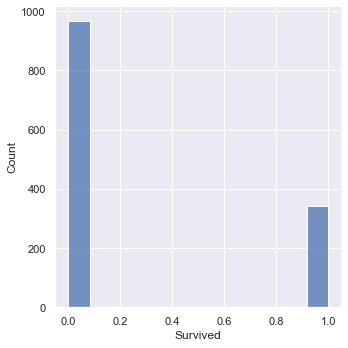

In [38]:
sns.displot(df['Survived'])

# Encoding the Categorical Columns

In [39]:
df['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [40]:
df['Embarked'].value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [41]:
df.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [42]:
df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,,
1,0.0,3,0,22.000000,1,0,0
2,1.0,1,1,38.000000,1,0,1
3,1.0,3,1,26.000000,0,0,0
4,1.0,1,1,35.000000,1,0,0
5,0.0,3,0,35.000000,0,0,0
6,0.0,3,0,29.881138,0,0,2
7,0.0,1,0,54.000000,0,0,0
8,0.0,3,0,2.000000,3,1,0
9,1.0,3,1,27.000000,0,2,0


In [43]:
x = df.drop(columns=['Survived'], axis=1)
y = df['Survived']

In [44]:
x

,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,
1,3,0,22.000000,1,0,0
2,1,1,38.000000,1,0,1
3,3,1,26.000000,0,0,0
4,1,1,35.000000,1,0,0
5,3,0,35.000000,0,0,0
...,...,...,...,...,...,...
1305,3,0,29.881138,0,0,0
1306,1,1,39.000000,0,0,1
1307,3,0,38.500000,0,0,0


In [45]:
y

PassengerId
1       0.0
2       1.0
3       1.0
4       1.0
5       0.0
       ... 
1305    0.0
1306    0.0
1307    0.0
1308    0.0
1309    0.0
Name: Survived, Length: 1309, dtype: float64

In [46]:
# assigning booleans
df = ["Sex","Pclass","Age","Parch","SibSp"]
new_df  = pd.get_dummies(df, columns = df , prefix= df )

In [47]:
# 0 and 1 s
new_df = new_df.astype(int)
new_df

,"['Sex', 'Pclass', 'Age', 'Parch', 'SibSp']_Age","['Sex', 'Pclass', 'Age', 'Parch', 'SibSp']_Parch","['Sex', 'Pclass', 'Age', 'Parch', 'SibSp']_Pclass","['Sex', 'Pclass', 'Age', 'Parch', 'SibSp']_Sex","['Sex', 'Pclass', 'Age', 'Parch', 'SibSp']_SibSp"
0,0,0,0,1,0
1,0,0,1,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,0,0,1


In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [49]:
print(x.shape,x_train,x_test)

(1309, 6)              Pclass  Sex        Age  SibSp  Parch  Embarked
PassengerId                                                
371               1    0  25.000000      1      0         1
127               3    0  29.881138      0      0         2
1258              3    0  29.881138      1      0         1
1158              1    0  29.881138      0      0         0
1121              2    0  36.000000      0      0         0
...             ...  ...        ...    ...    ...       ...
467               2    0  29.881138      0      0         0
300               1    1  50.000000      0      1         1
494               1    0  71.000000      0      0         1
528               1    0  29.881138      0      0         0
1193              2    0  29.881138      0      0         1

[1047 rows x 6 columns]              Pclass  Sex        Age  SibSp  Parch  Embarked
PassengerId                                                
887               2    0  27.000000      0      0         0
294  

# Model Training with Logistic Regression

In [50]:
model = LogisticRegression()

In [51]:
# Training the Logistic Regression model with training data

In [52]:
model.fit(x_train,y_train)

LogisticRegression()

# Model Evaluation using Accuracy Score

In [53]:
#Accuracy on training data

In [54]:
x_train_prediction = model.predict(x_train)

In [55]:
print(x_train_prediction)

[0. 0. 0. ... 0. 0. 0.]


In [56]:
training_data_accuracy = accuracy_score(y_train,x_train_prediction)

In [57]:
print(training_data_accuracy)

0.7889207258834766


In [58]:
# Accuracy score on test data

In [59]:
x_test_prediction = model.predict(x_test)

In [60]:
print(x_test_prediction)

[0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [61]:
testing_data_accuracy = accuracy_score(y_test,x_test_prediction)

In [62]:
print(testing_data_accuracy)

0.7709923664122137


In [63]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

dt_pred = dt.predict(x_test)
print(mean_squared_error(y_test , dt_pred))
print(accuracy_score(y_test , dt_pred))
print(confusion_matrix(y_test , dt_pred))

0.24045801526717558
0.7595419847328244
[[172  23]
 [ 40  27]]


In [64]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

rf_pred = rf.predict(x_test)
print(mean_squared_error(y_test , rf_pred))
print(accuracy_score(y_test , rf_pred))
print(confusion_matrix(y_test , rf_pred))

0.24045801526717558
0.7595419847328244
[[172  23]
 [ 40  27]]


In [65]:
svm = DecisionTreeClassifier()
svm.fit(x_train,y_train)

svm_pred = svm.predict(x_test)
print(mean_squared_error(y_test , svm_pred))
print(accuracy_score(y_test , svm_pred))
print(confusion_matrix(y_test , svm_pred))

0.2366412213740458
0.7633587786259542
[[172  23]
 [ 39  28]]


In [66]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(x_train,y_train)
prediction=knn_classifier.predict(x_test)
confusion_matrix = confusion_matrix(y_test,prediction)
print(confusion_matrix)
accuracy_score = accuracy_score(y_test,prediction)
print(accuracy_score)
print(mean_squared_error(y_test ,prediction))


[[173  22]
 [ 38  29]]
0.7709923664122137
0.22900763358778625


In [67]:
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size=0.2, random_state=0)
model =  LinearRegression()

model.fit(x_train,y_train)

print(model.coef_)

[-0.12420727  0.31094899 -0.00471079 -0.02790242 -0.00081364  0.00115165]


In [68]:
Lr_pred = model.predict(x_test)
print(Lr_pred)

[ 0.48132581  0.38039447  0.07222442  0.1117583   0.63494947  0.31777573
  0.07222442  0.07407198  0.32736856  0.68054341  0.07107277  0.07222442
  0.55633614  0.1994309   0.3563049   0.57726834  0.36527516  0.60253388
  0.35527098  0.3831734   0.05993961  0.42687775  0.43035906  0.31833567
  0.28628562  0.3831734   0.34733464  0.41869682  0.44536621  0.11406159
 -0.05275704 -0.15492555  0.0128317   0.25218699  0.45740954  0.11855813
  0.07878277  0.51246892  0.52372292  0.24862784  0.38013216  0.11819581
  0.59726315  0.26848978  0.06992112  0.25480873  0.45624402  0.4179965
  0.49980665  0.62872472  0.41030164  0.48718825  0.13703898  0.09291514
  0.58161681  0.66203825  0.3831734   0.30594243  0.11646909 -0.02485462
 -0.15492555  0.06992112  0.24538715  0.34564491  0.08349356  0.438629
  0.07407198  0.25009794  0.10233672  0.08993107  0.06992112  0.32442327
 -0.05076397  0.09992922  0.04432199  0.34769696  0.1117583   0.38484295
  0.41087821  0.24774255  0.49600895  0.09291514  0.41

In [69]:
from sklearn.metrics import mean_squared_error
print('Mean Squared Error:',mean_squared_error(y_test,Lr_pred))

Mean Squared Error: 0.1541551503392694


# Thus the logistic regression gives the best accuracy score among all the algorothm